# Pandas <sup><sub>(Continued)</sub></sup>
We'll continue with Pandas from last class. Let's get going.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # for high quality figures

In [2]:
plt.rcParams['figure.figsize'] = 8, 6

In [3]:
# load the titanic dataset
df = pd.read_csv('../resources/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# drop some columns
df.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Feature Mapping
### New feature from existing features

In [5]:
# add a new column 'Family'
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0


### Categorical values to Numerical values

In [6]:
# using dictionary map
gender_map = {'male': 0, 'female': 1}
df['Gender'] = df['Sex'].map(gender_map)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Gender
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0


In [7]:
# using factorize() method
sex_numeric, values_index = df['Sex'].factorize()
sex_numeric

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [8]:
values_index

Index(['male', 'female'], dtype='object')

In [10]:
df['Gender'] = sex_numeric
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Gender
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0


### Numerical Values to Categorical Values

In [13]:
# categorize age
pd.cut(df['Age'], bins=[0, 10, 25, 50, 100]).value_counts()

(25, 50]     349
(10, 25]     237
(50, 100]     64
(0, 10]       64
Name: Age, dtype: int64

In [14]:
df['Age_type'] = pd.cut(df['Age'], bins=[0, 10, 25, 50, 100], labels=['Child', 'Young', 'Adult', 'Old'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Gender,Age_type
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,Young
1,2,1,1,female,38.0,1,0,71.2833,C,1,1,Adult
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,Adult
3,4,1,1,female,35.0,1,0,53.1000,S,1,1,Adult
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,Adult


In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
pd.cut(df['Fare'], bins=3).value_counts()

(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: Fare, dtype: int64

In [17]:
pd.cut(df['Fare'], bins=3, labels=['Low', 'Medium', 'High']).value_counts()

Low       871
Medium     17
High        3
Name: Fare, dtype: int64

## Aggregation

In [18]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
Family           0.904602
Gender           0.352413
dtype: float64

In [19]:
df.aggregate('mean')

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
Family           0.904602
Gender           0.352413
dtype: float64

In [22]:
df.aggregate(max)

PassengerId        891
Survived             1
Pclass               3
Sex               male
Age                 80
SibSp                8
Parch                6
Fare           512.329
Family              10
Gender               1
dtype: object

In [23]:
df.aggregate(['mean', 'median', max])  # note that max is a function object

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Gender,Age_type
mean,446.0,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,0.904602,0.352413,NaN
median,446.0,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,NaN
max,891.0,1.000000,3.000000,male,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,Old


In [25]:
df.aggregate({'Age': 'mean', 'Pclass': 'median', 'Gender': 'std'})

Age       29.699118
Pclass     3.000000
Gender     0.477990
dtype: float64

In [26]:
df.aggregate({'Age': 'mean', 'Pclass': 'median', 'Fare': max})

Age        29.699118
Pclass      3.000000
Fare      512.329200
dtype: float64

## Grouping

In [40]:
df.groupby('Sex')  # returns a groupby object, not dataframe

In [30]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Gender
Sex,,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,1.343949,1.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.665511,0.0


In [31]:
df.groupby('Sex')['Age']  # still a groupby object

In [32]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

The `groupby` operation can be broken down into three steps:
1. **Split**: Create groups based on some attribute (column). 
2. **Apply**: We can then apply some operation to each group like mean, median, count, etc.
3. **Combine**: Combine the results from *apply* step into a single dataframe.

In [33]:
df.groupby('Sex')['Survived'].value_counts()  # nested series (multi-index series)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [34]:
df.groupby('Sex')['Survived'].value_counts().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


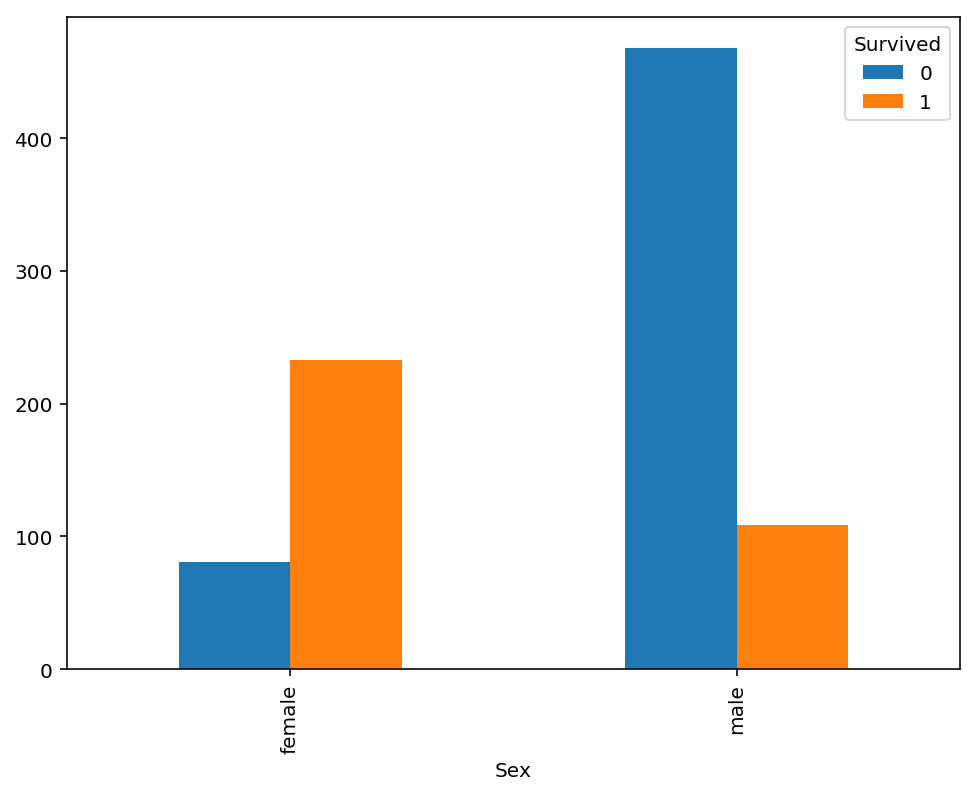

In [37]:
df.groupby('Sex')['Survived'].value_counts().unstack().plot.bar()

In [38]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


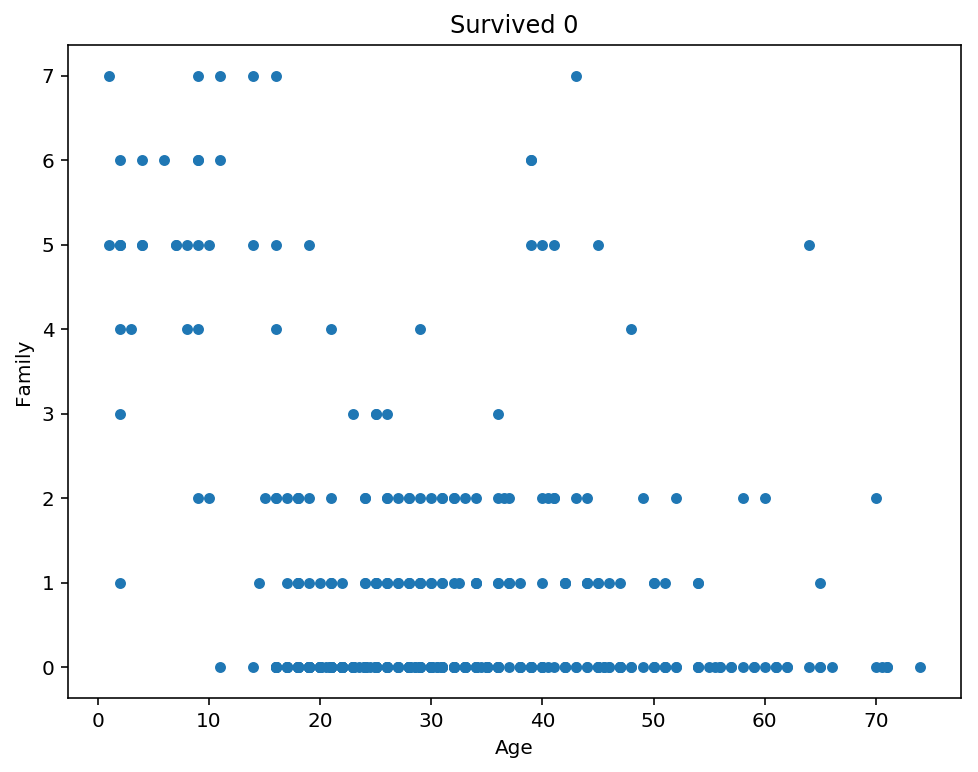

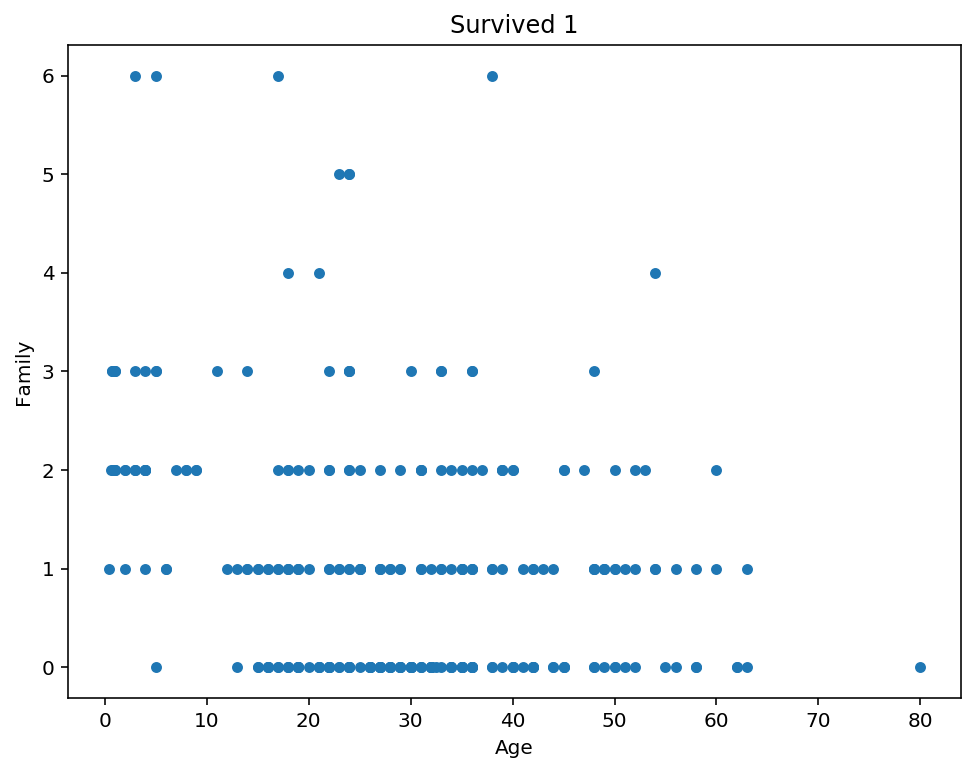

In [41]:
# plotting with groupby objects
grp_by_pclass = df.groupby('Survived')
for name, group in grp_by_pclass:
    group.plot.scatter(x='Age', y='Family', title='Survived ' + str(name))

In [42]:
# Aggregation
df.groupby('Pclass')['Age'].aggregate('median')

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

## Concatination and Merging

### Concatination

In [49]:
pd.np.random.seed(2)
df1 = df[['PassengerId', 'Sex', 'Age', 'Survived']].sample(3)
df1

,PassengerId,Sex,Age,Survived
707,708,male,42.0,1
37,38,male,21.0,0
615,616,female,24.0,1


In [50]:
pd.np.random.seed(6)
df2 = df[['PassengerId', 'Sex', 'Age', 'Survived']].sample(4)
df2

,PassengerId,Sex,Age,Survived
257,258,female,30.0,1
4,5,male,35.0,0
488,489,male,30.0,0
651,652,female,18.0,1


In [51]:
pd.concat([df1, df2])

,PassengerId,Sex,Age,Survived
707,708,male,42.0,1
37,38,male,21.0,0
615,616,female,24.0,1
257,258,female,30.0,1
4,5,male,35.0,0
488,489,male,30.0,0
651,652,female,18.0,1


In [52]:
pd.concat([df1, df2], ignore_index=True)

,PassengerId,Sex,Age,Survived
0,708,male,42.0,1
1,38,male,21.0,0
2,616,female,24.0,1
3,258,female,30.0,1
4,5,male,35.0,0
5,489,male,30.0,0
6,652,female,18.0,1


In [53]:
pd.concat([df1, df2]).reset_index()

,index,PassengerId,Sex,Age,Survived
0,707,708,male,42.0,1
1,37,38,male,21.0,0
2,615,616,female,24.0,1
3,257,258,female,30.0,1
4,4,5,male,35.0,0
5,488,489,male,30.0,0
6,651,652,female,18.0,1


In [54]:
pd.concat([df1, df2], axis=1)

,PassengerId,Sex,Age,Survived,PassengerId,Sex,Age,Survived
4,NaN,NaN,NaN,NaN,5.0,male,35.0,0.0
37,38.0,male,21.0,0.0,NaN,NaN,NaN,NaN
257,NaN,NaN,NaN,NaN,258.0,female,30.0,1.0
488,NaN,NaN,NaN,NaN,489.0,male,30.0,0.0
615,616.0,female,24.0,1.0,NaN,NaN,NaN,NaN
651,NaN,NaN,NaN,NaN,652.0,female,18.0,1.0
707,708.0,male,42.0,1.0,NaN,NaN,NaN,NaN


### Merging

In [55]:
df1 = df[['PassengerId', 'Sex', 'Age']].iloc[2:7]
df1

,PassengerId,Sex,Age
2,3,female,26.0
3,4,female,35.0
4,5,male,35.0
5,6,male,NaN
6,7,male,54.0


In [56]:
df2 = df[['PassengerId', 'Fare', 'Survived']].iloc[4:10]
df2

,PassengerId,Fare,Survived
4,5,8.0500,0
5,6,8.4583,0
6,7,51.8625,0
7,8,21.0750,0
8,9,11.1333,1
9,10,30.0708,1


In [57]:
pd.merge(df1, df2, on='PassengerId')

,PassengerId,Sex,Age,Fare,Survived
0,5,male,35.0,8.0500,0
1,6,male,NaN,8.4583,0
2,7,male,54.0,51.8625,0


In [62]:
pd.merge(df1, df2, on='PassengerId', how='outer')

,PassengerId,Sex,Age,Fare,Survived
0,3,female,26.0,NaN,NaN
1,4,female,35.0,NaN,NaN
2,5,male,35.0,8.0500,0.0
3,6,male,NaN,8.4583,0.0
4,7,male,54.0,51.8625,0.0
5,8,NaN,NaN,21.0750,0.0
6,9,NaN,NaN,11.1333,1.0
7,10,NaN,NaN,30.0708,1.0


# Visualization with Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. Basically, it provides a high-level interface to draw statistical graphics.

Let's see some examples.

In [64]:
import seaborn as sns

In [65]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Gender,Age_type
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,Young
1,2,1,1,female,38.0,1,0,71.2833,C,1,1,Adult
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,Adult
3,4,1,1,female,35.0,1,0,53.1000,S,1,1,Adult
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,Adult


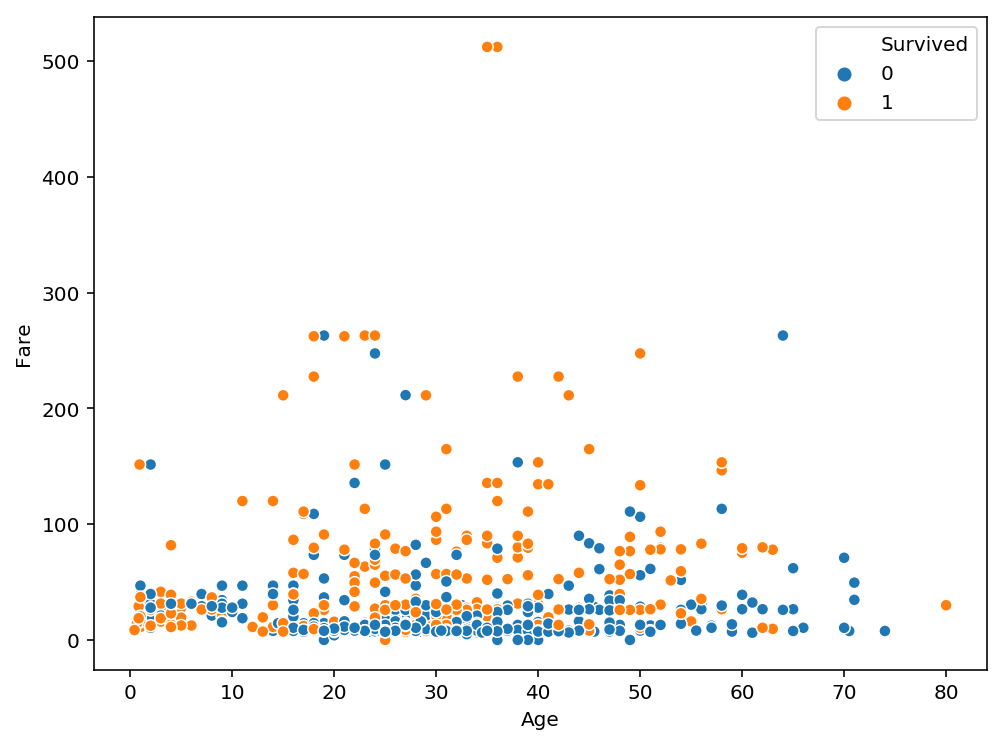

In [66]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)

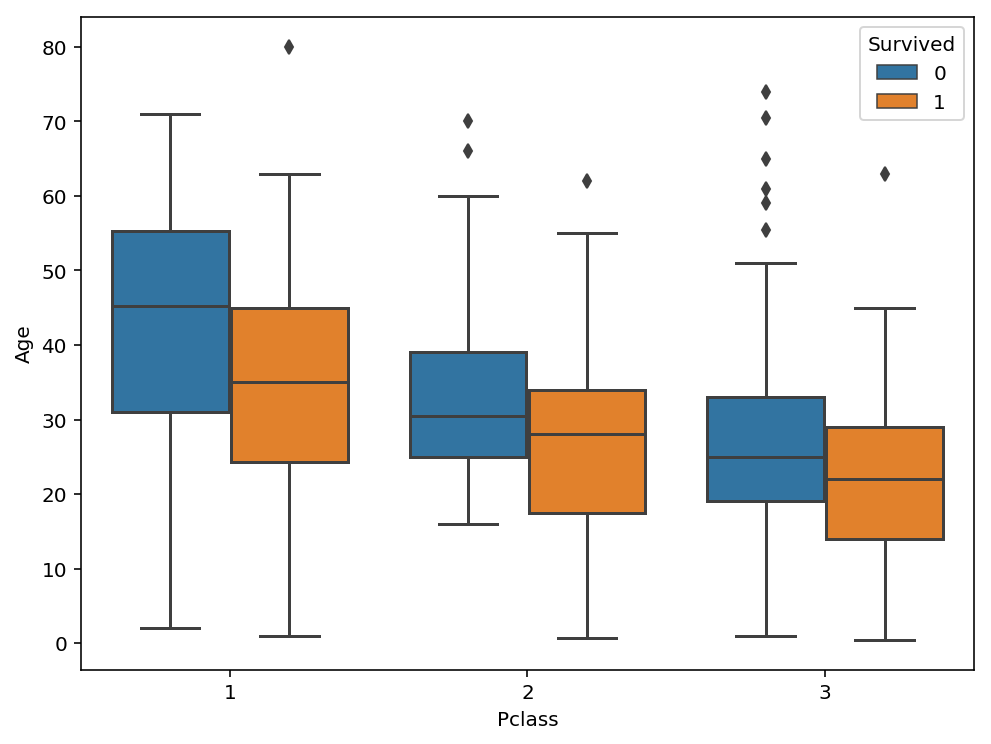

In [67]:
sns.boxplot(x='Pclass', y='Age',hue='Survived', data=df)

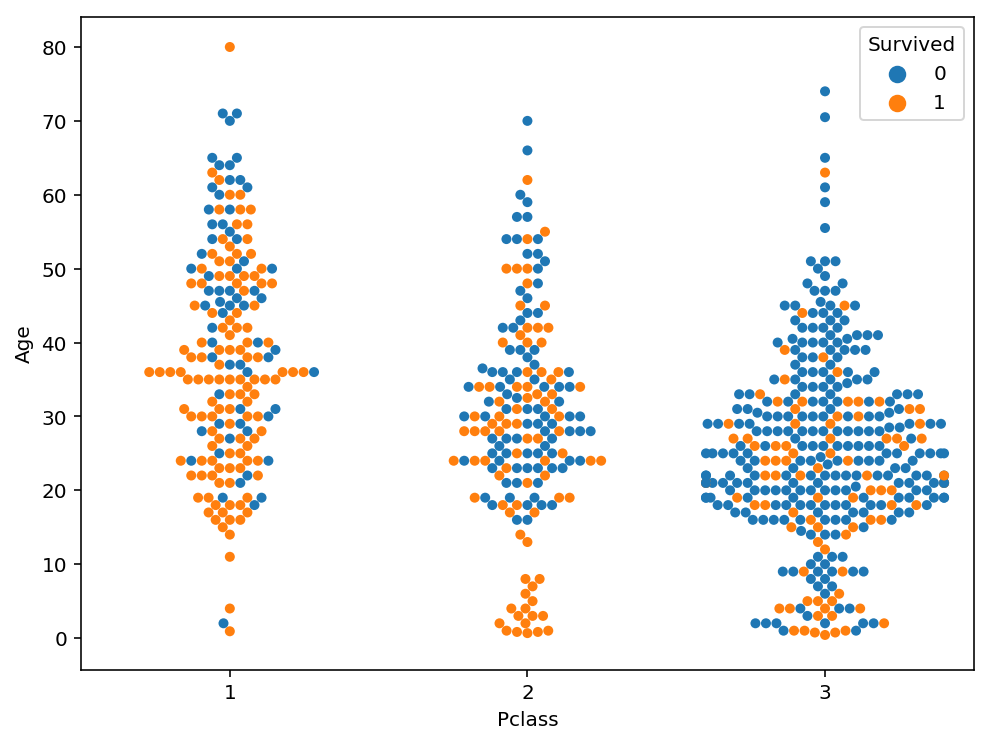

In [68]:
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df)

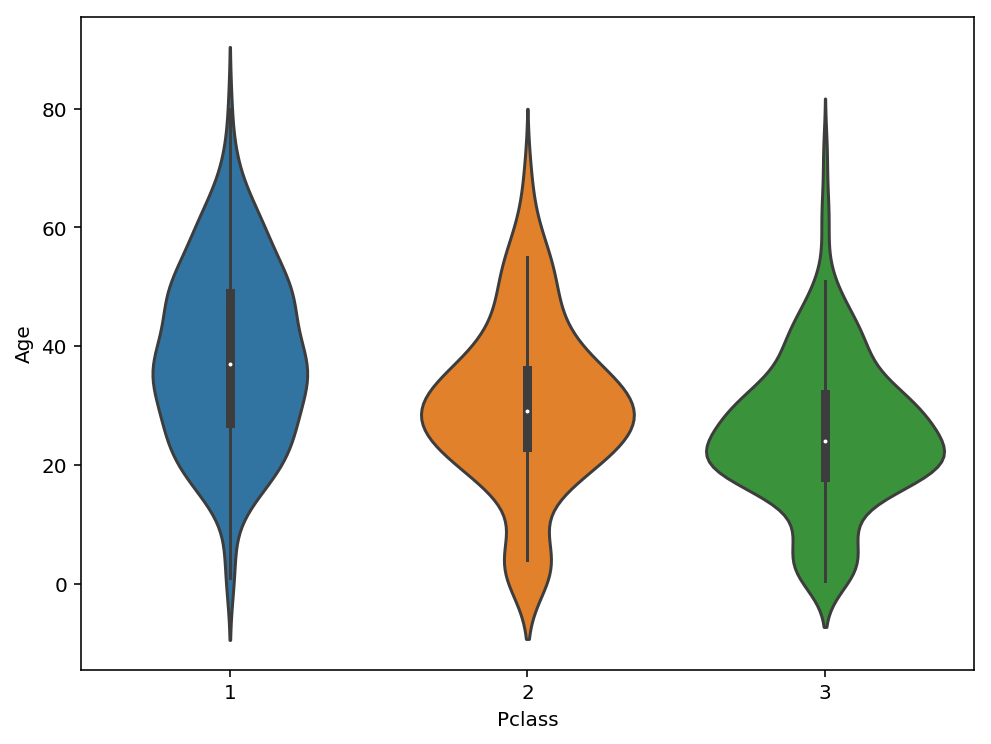

In [69]:
sns.violinplot(x='Pclass', y='Age', data=df)

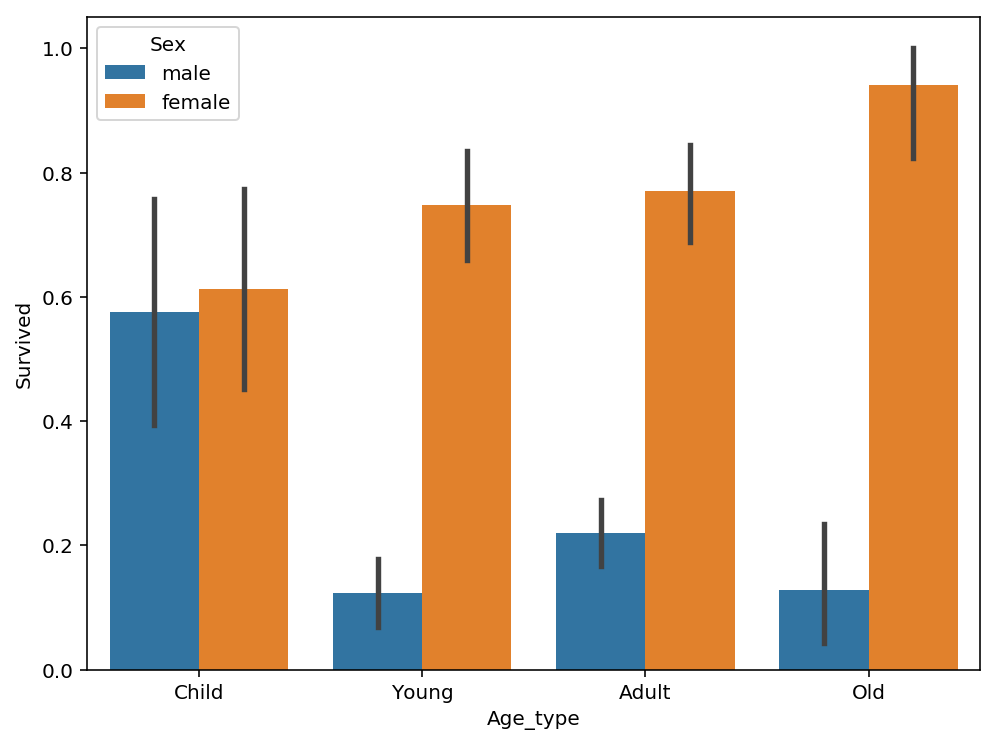

In [70]:
sns.barplot(x='Age_type', y='Survived', hue='Sex', data=df)

/home/ab/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ab/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


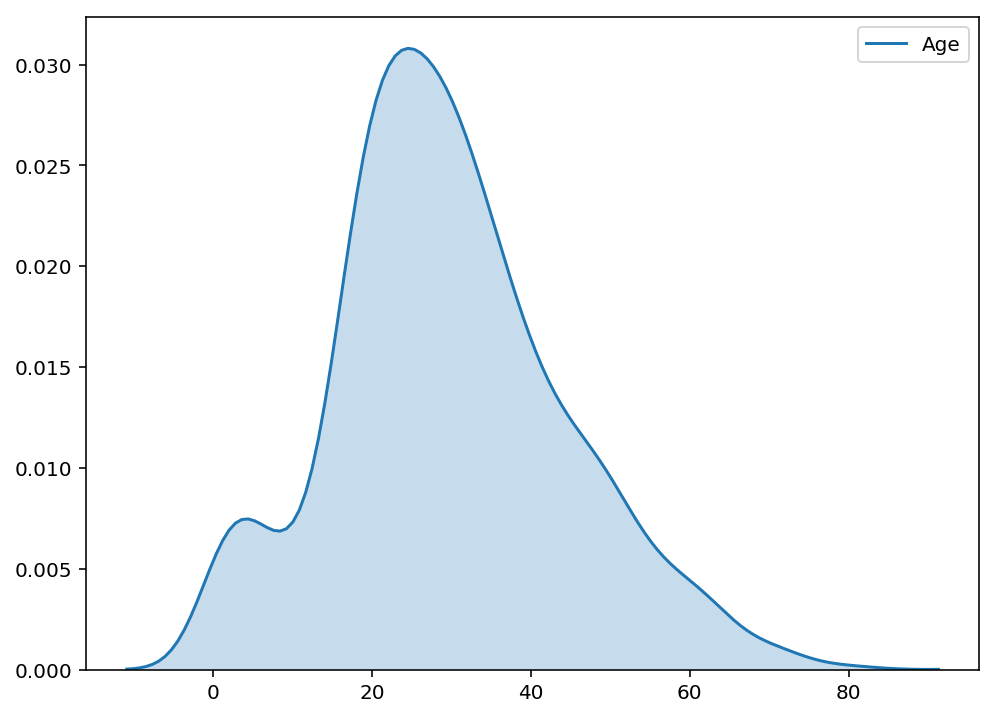

In [71]:
sns.kdeplot(df['Age'], shade=True)

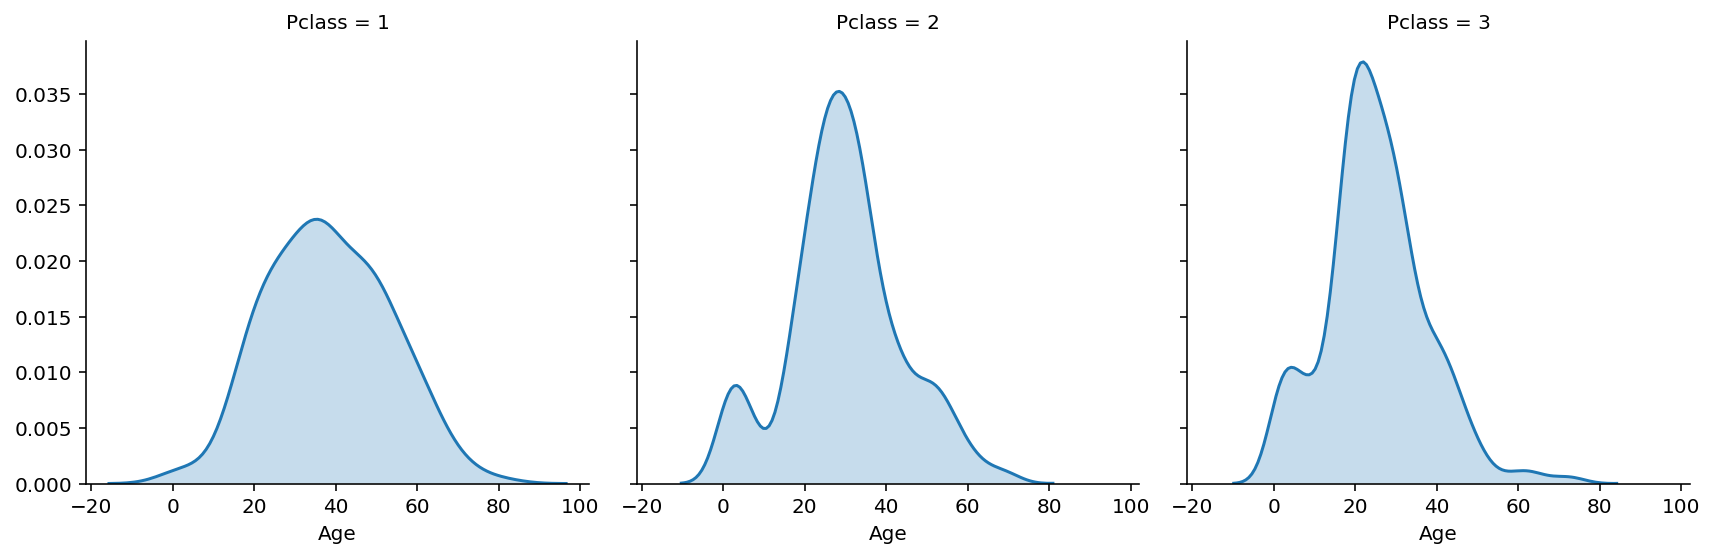

In [74]:
fg = sns.FacetGrid(df, col='Pclass', height=4)
fg.map(sns.kdeplot, 'Age', shade=True)

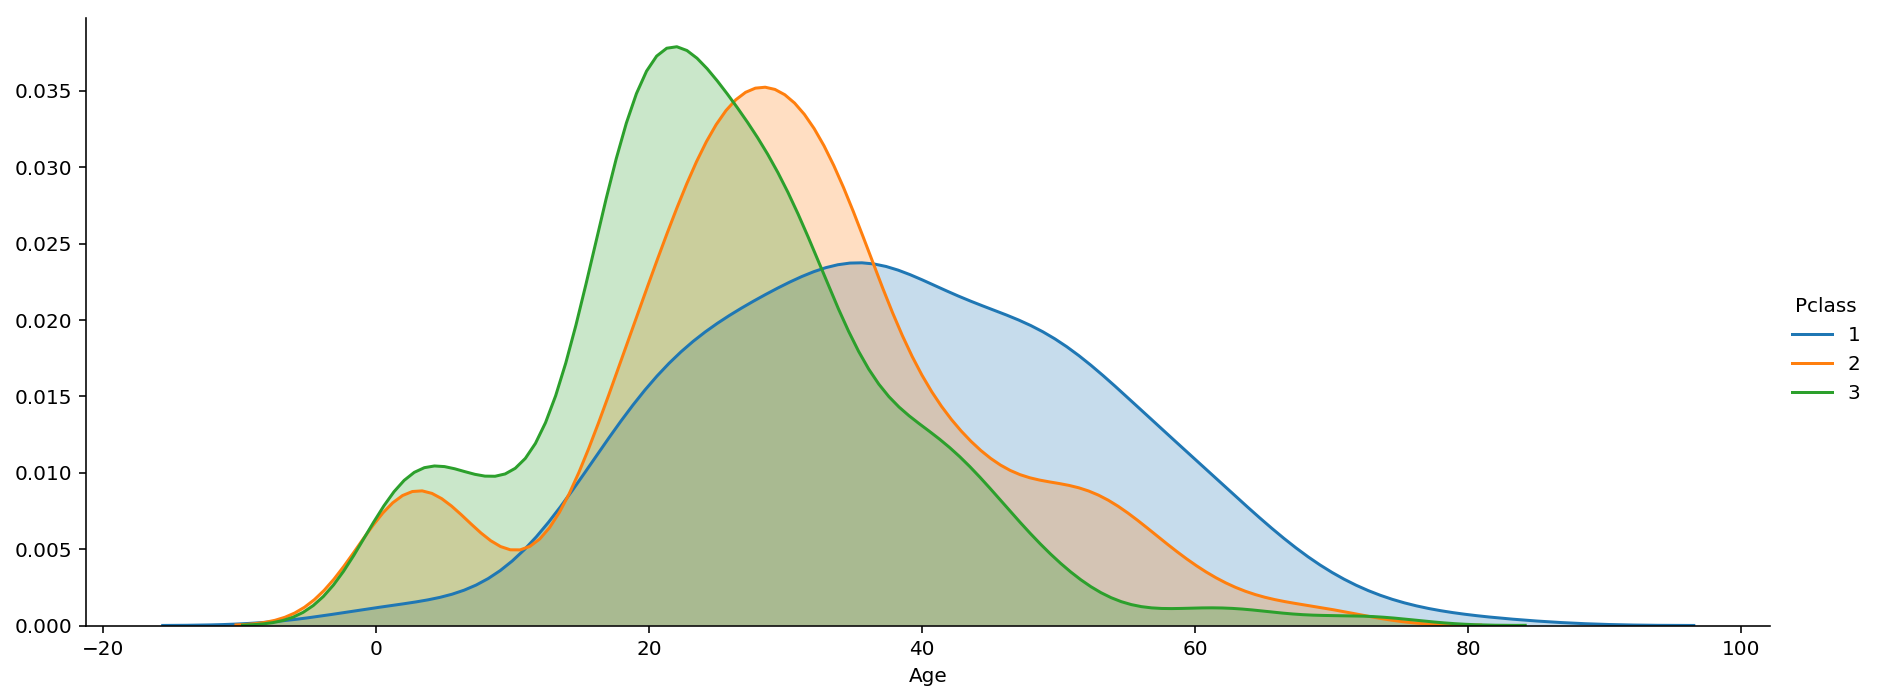

In [75]:
fg = sns.FacetGrid(df, hue='Pclass', height=5, aspect=2.5)
fg.map(sns.kdeplot, 'Age', shade=True).add_legend()

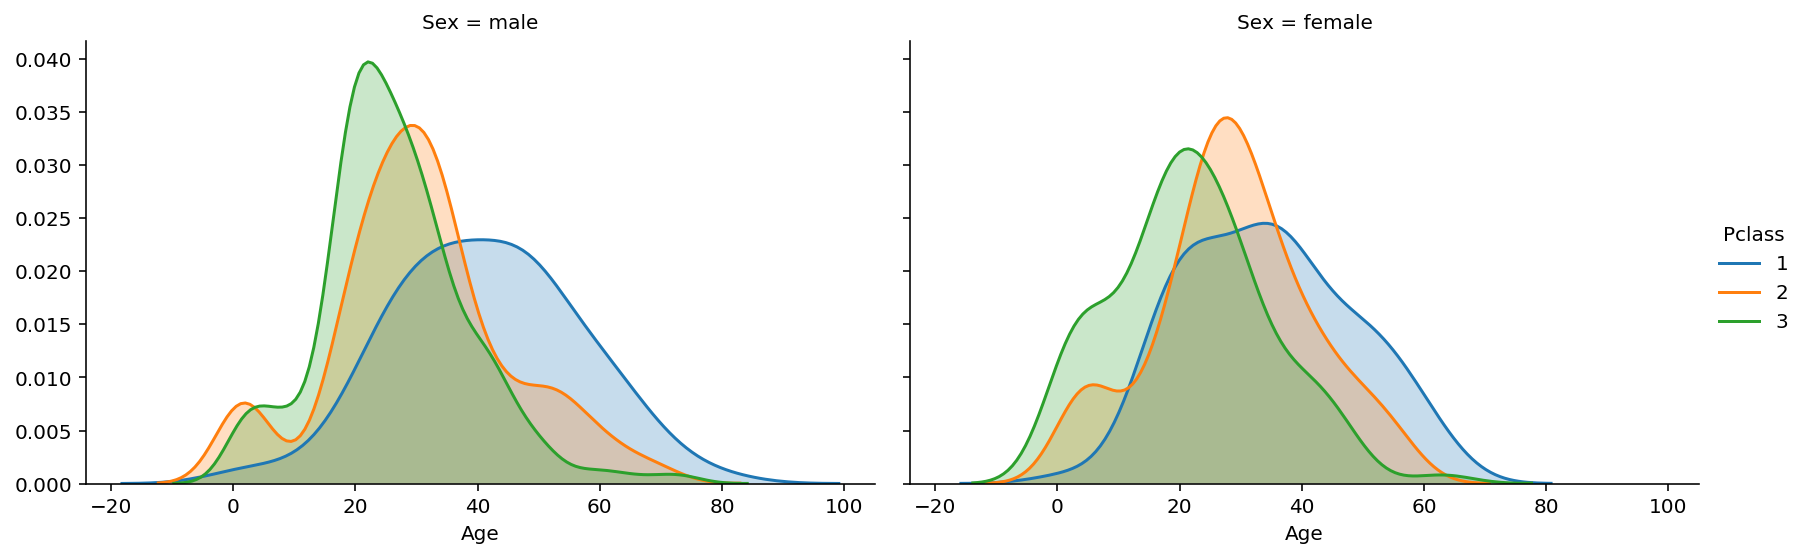

In [76]:
fg = sns.FacetGrid(df, col='Sex', hue='Pclass', height=4, aspect=1.5)
fg.map(sns.kdeplot, 'Age', shade=True).add_legend()

/home/ab/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


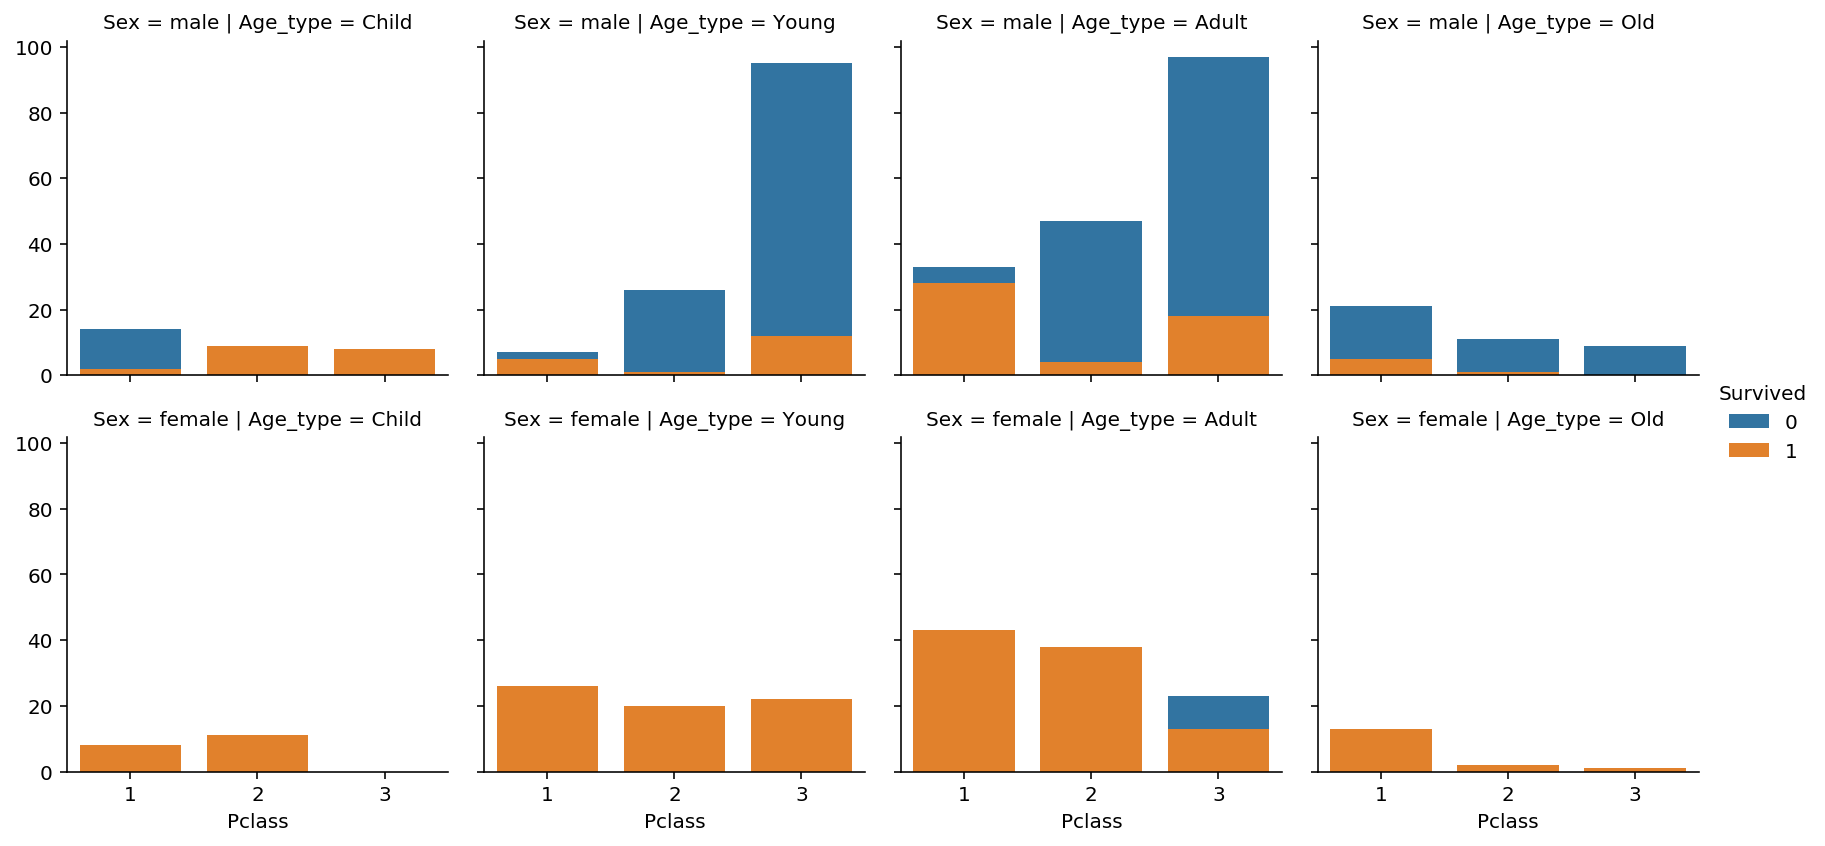

In [77]:
fg = sns.FacetGrid(df, row='Sex', col='Age_type', hue='Survived')
fg.map(sns.countplot, 'Pclass').add_legend()

In [78]:
df.corr()  # correlation between columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Gender
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,0.182333
Family,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,0.200988
Gender,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.200988,1.000000


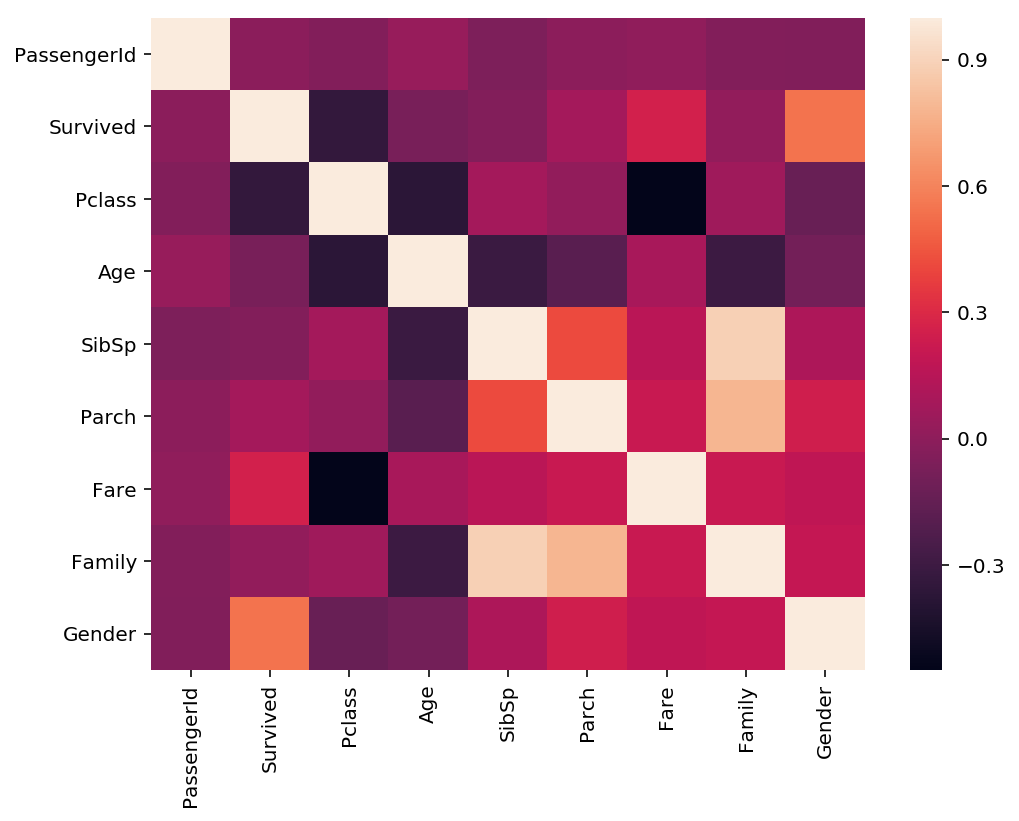

In [79]:
sns.heatmap(df.corr())

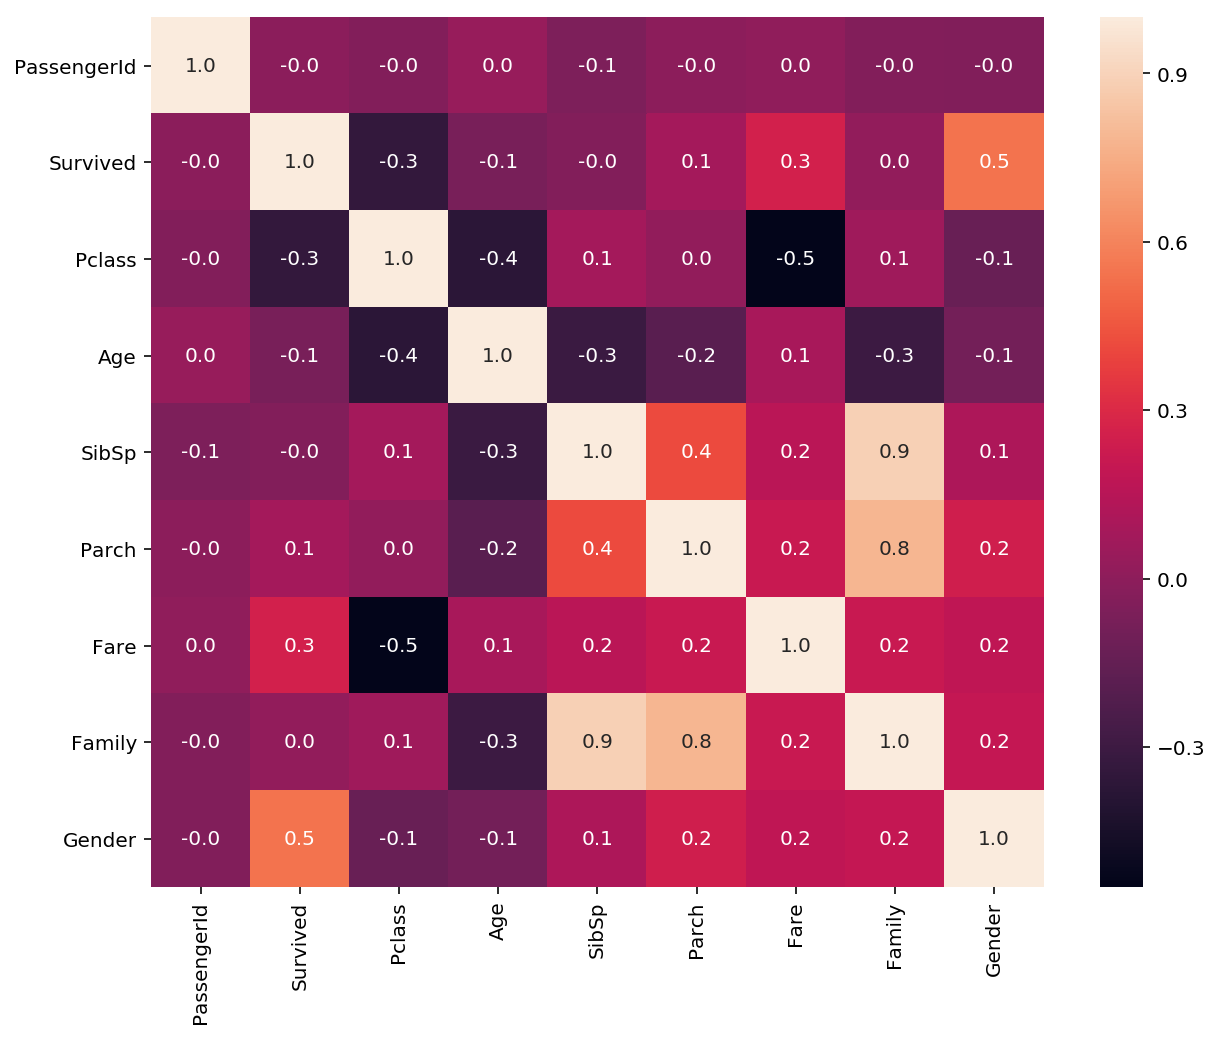

In [80]:
plt.subplots(figsize=(10,8))  # adjust figure size
sns.heatmap(df.corr(), annot=True, fmt='.1f')

In [81]:
# Loading the iris flower dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


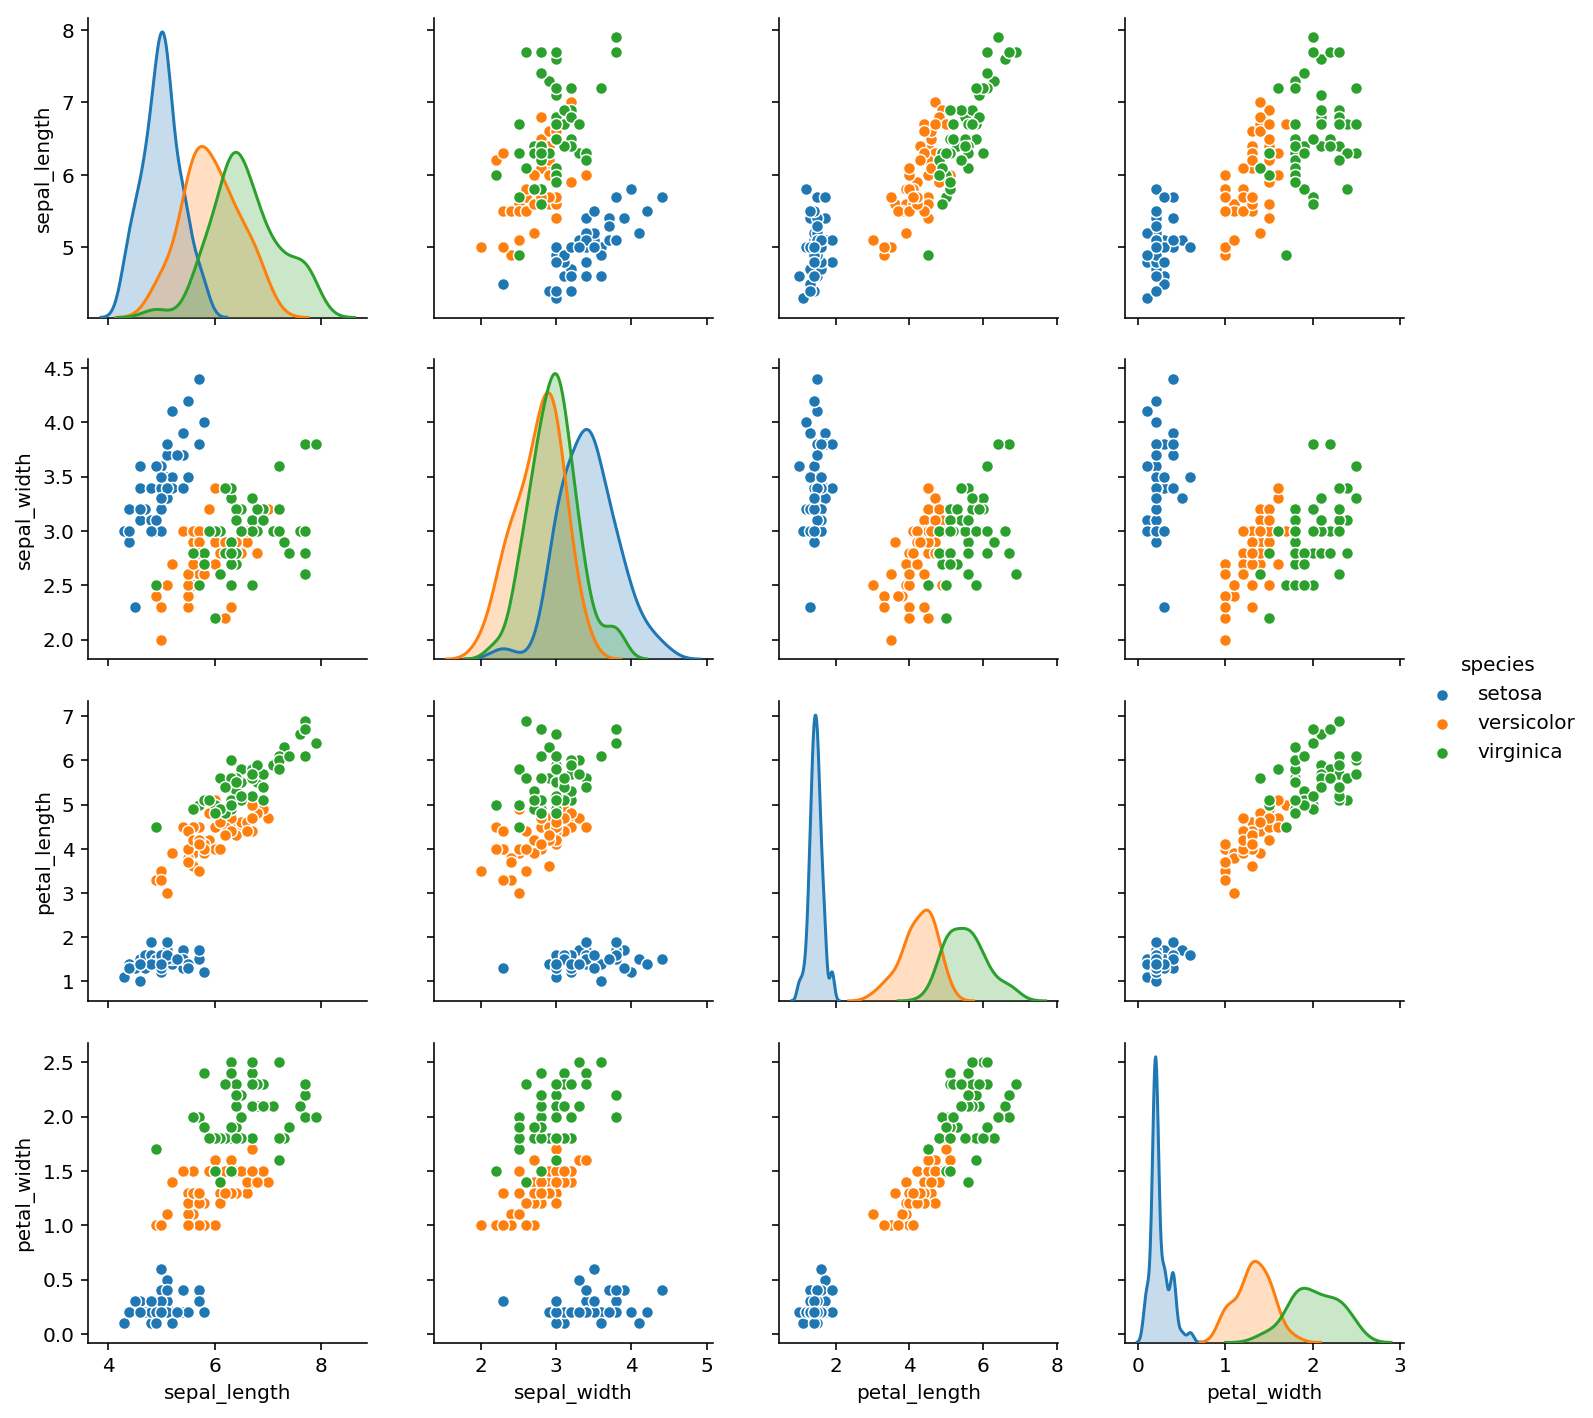

In [83]:
sns.pairplot(iris, hue='species')

# Task 9
Load the House Price dataset `house_data.csv` (source: [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction)) and answer the questions below based on the dataset.

1. Plot the correlation heatmap of features and list 5 most important features that influence the price.
2. Make boxplot showing the distribution of `price` based on `grade`.
3. Using `groupby()` and `aggregate()`, calculate median and maximum values of `price` based on `grade`.